In [35]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sphericalSampling.uniformSampling_unitSphere import fibonacci_lattice_unitSquare,\
sampleUnitSphere_geometric_fibonacci, sampleUnitSphere_geometric_heuristic, sampleUnitSphere_statistical_normal, \
spherical_cap_discrepancy
from sphericalSampling import utilities

# Uniform Spherical Sampling

In this notebook we will investigate how to equally distribute points on the surface of a unit sphere. Distributing points equally on a sphere is an optimization problem. Thus one can use different optimization cirteria to distribute points evenly on the unit sphere such as:

- Riesz s-energy
- Covering and packing with spherical caps (Spherical Code)
- Norms of the Lagrange polynomials
- ...

However, a characteristic of optimization problems on the sphere is that they have many local minima. For this reason, one has to prove that for a specific criterion a set of points corresponds to the global minimum to find the optimal point distribution. This prove could only be solved for some criteria and for a specific number of points. Thus distributing an abritrary number of points on the unit sphere remains an open problem [1].

For this reason, we need to use approximations for distributing points evenly on the unit sphere. In the following, we will investigate two near-optimal solutions (The spherical Fibonacci grid [2] and the generalized spiral points [3][4]) and one non-near-optimal solution (Stochastical spherical sampling). At the end, the aforementioned methods are evaluated by the spherical cap discrepancy metric [5].

## Spherical Fibonacci Grid

The spherical Fibonacci grid is created within two steps. The first step involves the generation of a Fibonacci lattice within the unit square [2]. The points within the Fibonacci lattice point set are created by

$$(x_i, y_i) = \left( \frac{i}{\Phi} \% 1, \frac{i}{N} \right) \quad \text{for} \; \; 0 \leq i < N $$

where $\Phi$ denotes the golden ration

$$ \Phi = \frac{1 + \sqrt{5}}{2} $$

  
  
and N denotes the number of points to be distributed.



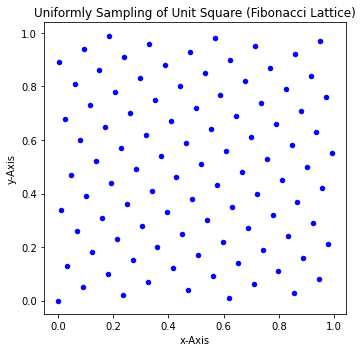

In [30]:
N = 100
p_euclid_2d = fibonacci_lattice_unitSquare(N)
utilities.plot_2D(p_euclid_2d, "Uniformly Sampling of Unit Square (Fibonacci Lattice)")

The second step involves wrapping the planar grid around a sphere in such a way as to preserve the equal-area property. Preserving the equal-area property is achieved by using an equal area projection [2].

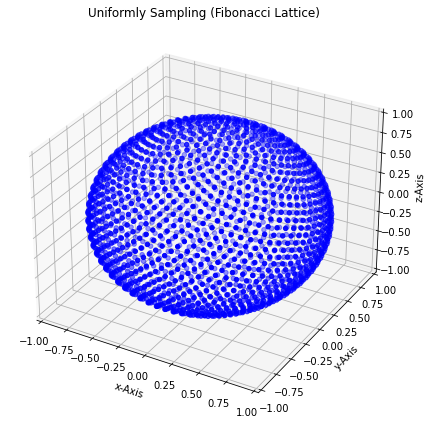

In [31]:
N = 2000
p_euclid, p_sphere = sampleUnitSphere_geometric_fibonacci(N)
utilities.plot_3D(utilities.sphere_2_euclid(p_sphere), "Uniformly Sampling (Fibonacci Lattice)")

## Generalized Spiral Points

The point set $\big\{ \big(\theta,\phi \big) \big\}^{N}_{i=1}$ given in spherical coordinates is called a generalized spiral on the sphere. The points within this set are described by 

$$ \theta_i = \arccos \big( h_i \big), \quad \text{for} \; \; 1 \leq i < N  $$

$$ \phi_i = \Bigg( \phi_{i-1} + \frac{C}{\sqrt{N}} \frac{1}{\sqrt{1-h_i^2}} \Bigg) \% 2 \pi, \quad \text{for} \; \; 2 \leq i \leq N-1$$

$$ h_i= -1 + 2 \frac{\big(i-1\big)}{\big(N-1\big)}$$

where $N$ denotes again the number of points to be distributed, $C$ denotes a constant which determines whether  successive points will have approximately the same (Euclidean) distance apart on the sphere or not and $\phi_1 = \phi_N = 0$. Setting the constant $C=3.6$ yields good estimates for the Shub and Smale problem which deals with uniformally distributing points on the sphere. Therefore, this point set leads to a near-optimal solutions for distributing points evenly on the unit sphere [3][4].


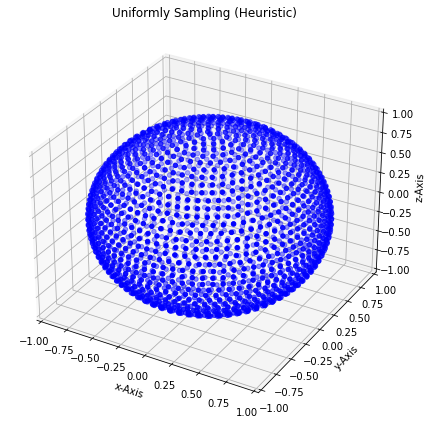

In [32]:
N = 2000
p_euclid, p_sphere = sampleUnitSphere_geometric_heuristic(N)
utilities.plot_3D(utilities.sphere_2_euclid(p_sphere), "Uniformly Sampling (Heuristic)")

## Stochastical Method

Another approach which can be used to evenly sample the surface of the unit sphere is a stochastical method. This approach involves three normally distributed random variables $X$, $Y$, $Z$ which are used to generate a vector $V = [X,Y,Z]$. This created vector $V$ can be considered as a new random variable with a specific propability distribution. Since the random variables $X$, $Y$ and $Z$ are independent, the probability distribution of $V$ is determined by

$$ f \big (x,y,z \big) = \left( \frac{1}{\sqrt{2\pi}} \mathrm{e}^{-\frac{1}{2}x^2} \right) \left( \frac{1}{\sqrt{2\pi}} \mathrm{e}^{-\frac{1}{2}y^2} \right) \left( \frac{1}{\sqrt{2\pi}} \mathrm{e}^{-\frac{1}{2}z^2} \right)  = \frac{1}{\sqrt{2\pi}} \mathrm{e}^{-\frac{1}{2}\left(x^2 + y^2 + z^2 \right)}$$

This probability distribution indicates that all points of equal length share the same probability. However, $V$ maps three numerical values to points within the Euclidean space and not to the surface of the unit sphere. Thus, we create a new radom variable  $W = V/|V|$, which maps points to the unit sphere. Additionally, $W$ exhibits a uniform probability distribution.

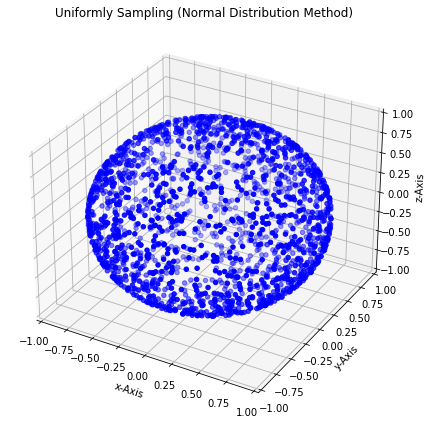

In [33]:
N = 2000
p_euclid, p_sphere = sampleUnitSphere_statistical_normal(N)
utilities.plot_3D(utilities.sphere_2_euclid(p_sphere), "Uniformly Sampling (Normal Distribution Method)")

## Evaluation

In this section, we evaluate the approximations' degree of uniformaty by using the spherical cap discrepancy metric. According to this metric uniformatiy is greater the smaller the spherical cap discrepancy [5]. In the following, we see that the near-optimal solutions (The spherical Fibonacci grid [2] and the generalized spiral points [3][4]) outperform the non-near-optimal solution (Stochastical spherical sampling). Furthermore, we see that the spherical cap discrepancy of point sets created by stochastical spherical sampling converges with the order of $N^{-1/2}$ [5].

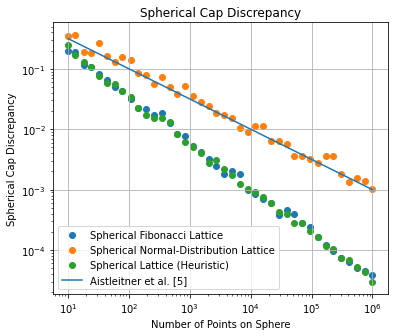

In [36]:
N = 40
Np = np.logspace(1,6, N, endpoint=True, dtype=int)
d_fibonacci = np.zeros((N,))
d_normal = np.zeros((N,))
d_heuristic = np.zeros((N,))
d_aistleitner = Np**(-1/2)

for i,n in enumerate(Np):
    p_euclid_f, _ = sampleUnitSphere_geometric_fibonacci(n)
    p_euclid_n, _ = sampleUnitSphere_statistical_normal(n)
    p_euclid_W, _ = sampleUnitSphere_geometric_heuristic(n)

    d_fibonacci[i] = spherical_cap_discrepancy(p_euclid_f)
    d_normal[i] = spherical_cap_discrepancy(p_euclid_n)
    d_heuristic[i] = spherical_cap_discrepancy(p_euclid_W)


fig = plt.figure(figsize=(6,5))
plt.title('Spherical Cap Discrepancy')
plt.grid(True)
plt.scatter(Np, d_fibonacci, label='Spherical Fibonacci Lattice')
plt.scatter(Np, d_normal, label='Spherical Normal-Distribution Lattice')
plt.scatter(Np, d_heuristic, label='Spherical Lattice (Heuristic)')
plt.plot(Np, d_aistleitner, label='Aistleitner et al. [5]')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Points on Sphere')
plt.ylabel('Spherical Cap Discrepancy')
plt.legend()

## References

 1. Womersley R, "[Distributing points on the sphere](https://www.maths.unsw.edu.au/about/distributing-points-sphere)". School of Mathematics and Statistics (UNSW), viewed 17 February 2022
 1. Swinbank, R. and Purser, R. J., "[Fibonacci grids: A novel approach to global modelling](https://rmets.onlinelibrary.wiley.com/doi/pdf/10.1256/qj.05.227)". Q. J. R. Meteorol. Soc. (2006), 132, pp. 1769–1793, doi: 10.1256/qj.05.227.
 1. E. A. Rakhmanov, E. B. Saff, and Y. M. Zhou, "[Minimal discrete energy on the
sphere](https://www.intlpress.com/site/pub/files/_fulltext/journals/mrl/1994/0001/0006/MRL-1994-0001-0006-a003.pdf)". Math. Res. Lett. (1994), 1, pp. 647–662.
 1. Habets E. A.P. and Gannot, S., "[Comments on Generating sensor signals in isotropic
noise fields](https://www.audiolabs-erlangen.de/content/05-fau/professor/00-habets/03-publications/Comments_on_Habets2007b.pdf)". 2013. 
 1. Aistleitner, C., Brauchart, J. S. and Dick, J, "[Point Sets on the Sphere S² with Small Spherical Cap Discrepancy](https://arxiv.org/pdf/1109.3265.pdf)". Discrete Comput. Geom. (2012), 48, pp. 990-1024.

